In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from deepctr.models import WDL
from deepctr.inputs import get_feature_names, SparseFeat

data = pd.read_csv("movielens_sample.txt")

sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ['rating']

In [2]:
# 对特征标签进行编码
for feature in sparse_features:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
# 计算每个特征中的 不同特征值的个数
fixlen_feature_columns = [SparseFeat(feature, data[feature].nunique()) for feature in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# 将数据集切分成训练集和测试集
train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:train[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}


In [6]:
# 使用WDL进行训练
model = WDL(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=100, verbose=True, validation_split=0.2, )
# 使用WDL进行预测
pred_ans = model.predict(test_model_input, batch_size=256)
# 输出RMSE或MSE
mse = round(mean_squared_error(test[target].values, pred_ans), 4)
rmse = mse ** 0.5
print("test RMSE", rmse)

Train on 128 samples, validate on 32 samples
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


128/128 [==============================] - 2s 16ms/sample - loss: 13.9209 - mse: 13.9209 - val_loss: 13.9635 - val_mse: 13.9635
Epoch 2/100
128/128 [==============================] - 0s 143us/sample - loss: 13.8054 - mse: 13.8054 - val_loss: 13.8600 - val_mse: 13.8600
Epoch 3/100
128/128 [==============================] - 0s 151us/sample - loss: 13.6846 - mse: 13.6846 - val_loss: 13.7501 - val_mse: 13.7501
Epoch 4/100
128/128 [==============================] - 0s 161us/sample - loss: 13.5572 - mse: 13.5572 - val_loss: 13.6346 - val_mse: 13.6346
Epoch 5/100
128/128 [==============================] - 0s 150us/sample - loss: 13.4240 - mse: 13.4240 - val_loss: 13.5135 - val_mse: 13.5135
Epoch 6/100
128/128 [==============================] - 0s 153us/sample - loss: 13.2851 - mse: 13.2851 - val_loss: 13.3862 - val_mse: 13.3862
Epoch 7/100
128/128 [==============================] - 0s 152us/sample - loss: 13.1400 - mse: 13.1400 - val_loss: 13.2524 - val_mse: 13.2524
Epoch 8/100
128/128 [=====

Epoch 60/100
128/128 [==============================] - 0s 164us/sample - loss: 1.1897 - mse: 1.1897 - val_loss: 0.9384 - val_mse: 0.9383
Epoch 61/100
128/128 [==============================] - 0s 177us/sample - loss: 1.1381 - mse: 1.1381 - val_loss: 0.9521 - val_mse: 0.9521
Epoch 62/100
128/128 [==============================] - 0s 191us/sample - loss: 1.0786 - mse: 1.0786 - val_loss: 0.9721 - val_mse: 0.9721
Epoch 63/100
128/128 [==============================] - 0s 163us/sample - loss: 1.0154 - mse: 1.0154 - val_loss: 0.9991 - val_mse: 0.9990
Epoch 64/100
128/128 [==============================] - 0s 180us/sample - loss: 0.9522 - mse: 0.9521 - val_loss: 1.0331 - val_mse: 1.0331
Epoch 65/100
128/128 [==============================] - 0s 143us/sample - loss: 0.8919 - mse: 0.8919 - val_loss: 1.0739 - val_mse: 1.0739
Epoch 66/100
128/128 [==============================] - 0s 166us/sample - loss: 0.8370 - mse: 0.8370 - val_loss: 1.1206 - val_mse: 1.1206
Epoch 67/100
128/128 [============

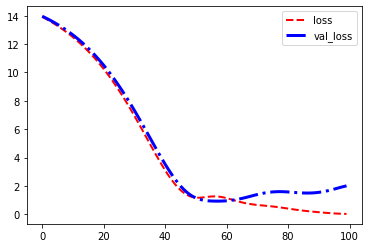

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(history.history['loss'])),history.history['loss'],color='red',linewidth=2.0,linestyle='--')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'],color='blue',linewidth=3.0,linestyle='-.')
plt.legend(["loss", "val_loss"])
plt.show()
# history.history['val_loss']

可以看到大概在50epoch左右得到最优值